# In this code I assign zeros to the mask array

In [1]:
# Importing libraries
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

$$\textbf{We used several data products from the Planck 2018
data release.}$$ $$\textbf{We used the Planck SMICA component
separation maps, both full mission and half mission
(HM) maps2 in our analyses.}$$
$$\textbf{I  download the COM_CMB_IQU-smica_2048_R3.00_hm2 CMB map (https://pla.esac.esa.int/).}$$

$$\textbf{The Planck maps we used in the
paper were originally created at HEALPix (Gorski et al.
2005) resolution NSIDE = 2048}$$ $$\textbf{ at an approximate angular resolution of 50
full width half maximum (FWHM).}$$

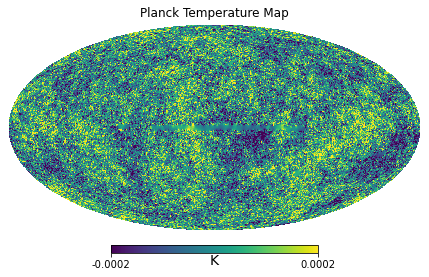

In [2]:
planck_IQU_SMICA=hp.read_map('/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
fig=plt.figure(1)
hp.mollview(planck_IQU_SMICA, min=-0.0002,max=0.0002,
title='Planck Temperature Map',fig=1,unit='K')

$2. \textbf{. For the full-sky analysis, we used the 2018 vesion of the Planck common masks3
for temperature}$$ 
\textbf{ and Q/U polarization. These masks were originally generated at NSIDE=2048.}$

$a.\textbf{We downloaded the COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits}$$ \textbf{ -- Temperature confidence mask with fsky = 77.9%.}$

In [10]:
# Read the map
mask=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

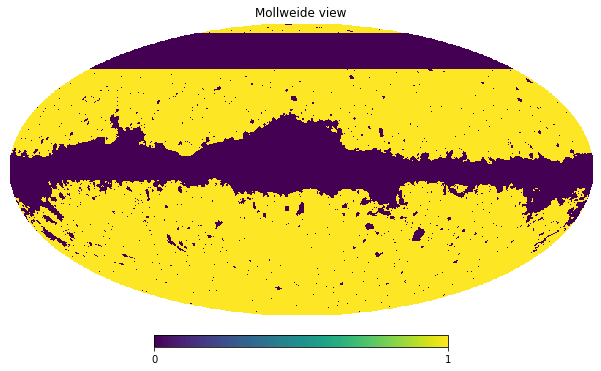

In [15]:
# Visualization the mask with hp.mollview
hp.mollview(mask)

In [11]:
mask.shape

(50331648,)

In [13]:
mask[1]

1.0

In [12]:
mask

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

$b. \textbf{In this part I assigned 0 to some regions (component) of the mask array}$

In [16]:
for i in np.arange(503334, 5033160,1):
    mask[i]=0
for j in np.arange(0, 250000,1):
    mask[j]=0

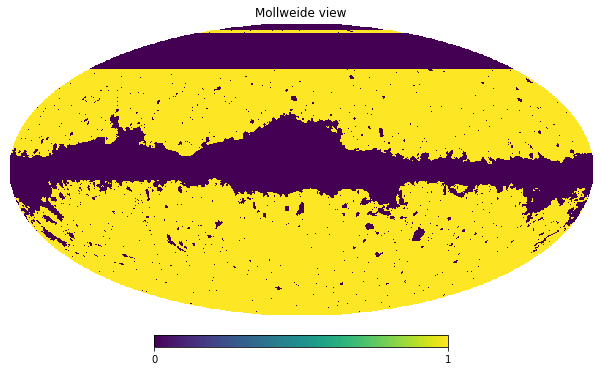

In [17]:
# Visualization the new mask

hp.mollview(mask)

$c. \textbf{ I compute the pseudo $D_{ls}$ of this mask with namaster library python}$

In [18]:
#import pymaster
import pymaster as nmt

In [19]:
# HEALPix resolution parameter used here
nside = 2048

In [20]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_0=nmt.NmtField(mask, [planck_IQU_SMICA])

In [21]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [22]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_00 = nmt.compute_full_master(f_0, f_0, b)

In [23]:
# Shape of the pseudo Cls
cl_00.shape
cl_00[0]


array([2.29363941e-10, 6.81028013e-11, 3.51206407e-11, ...,
       1.47263279e-18, 1.58632542e-18, 1.85366688e-18])

In [24]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el = b.get_effective_ells()
el.shape
el


array([3.5000e+00, 7.5000e+00, 1.1500e+01, ..., 6.1315e+03, 6.1355e+03,
       6.1395e+03])

(0.0, 2500.0)

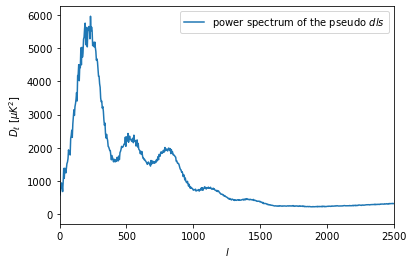

In [25]:
#plot results
dl=cl_00[0]*[(1e6)**(2)]*el*(el+1)/2/np.pi
plt.plot(el,dl, label='power spectrum of the pseudo $dls$')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

$d.\textbf{I compute the correlation function of this $D_{ls}$ with camb correlation function (Lewis et al. 2022)}$

In [27]:
# Make an array to input in the camb correlation function
Dl=np.ones((len(dl),4))
Dl[:,0]=dl
Dl.shape

(1535, 4)

In [28]:
# Import correlations
from camb import correlations

In [29]:
corr_, xvals, weights = correlations.gauss_legendre_correlation(Dl) 
xvals_=np.linspace(-1,1,1535)
r_=np.arccos(xvals_)*180/np.pi # sampled theta values in degrees

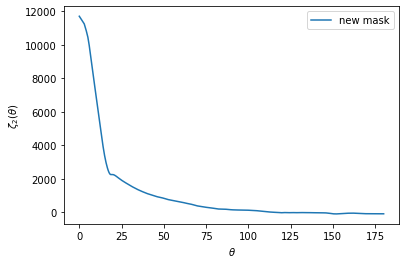

In [30]:
# Plol the results
plt.plot(r_, corr_[:,0], label = 'new mask')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')